In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

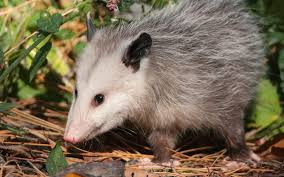

# The Possum dataset

The Possum dataset consists of different parameters that determine the actual model of his body.
At this notebook I will present diffrent methods in order to guess another possum body based on the data below

In [286]:
data_set = pd.read_csv("possum.csv")

In [287]:
data_set

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [288]:
X = data_set["totlngth"]
y = data_set["hdlngth"]

# LEAST ORDINARY SQUARE METHOD

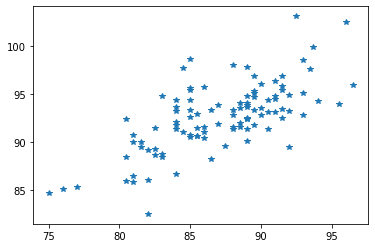

In [289]:
plt.plot(X, y, "*");

In [290]:
X_avg = np.mean(X)
y_avg = np.mean(y)

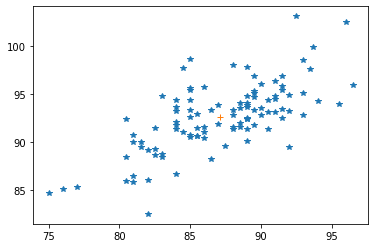

In [291]:
plt.plot(X, y, "*");
plt.plot(X_avg, y_avg, "+");
plt.show();

# Finding the coefficients a and b from the linear function y = a * X + b

In order to find a and b we need to solve this ecuation


$$\begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} sum(X^2) & sum(X) \\ sum(X) & N \end{bmatrix}^{-1} \cdot \begin{bmatrix} sum(X \cdot y) \\ sum(y) \end{bmatrix}$$

where 
$$sum(X) = \sum_{k=0}^{N} x $$
$$sum(y) = \sum_{k=0}^{N} \ y$$
$$sum(X \cdot y)= \sum_{k=0}^{N} \ x \cdot y$$
$$sum(X^2)= \sum_{k=0}^{N} \ x^2 $$

          

* and N is the lenght of the X.

In [292]:
A = np.array([[np.sum(X*X), np.sum(X)], [np.sum(X), X.size]])
A

array([[7.9069144e+05, 9.0572000e+03],
       [9.0572000e+03, 1.0400000e+02]])

In [293]:
B = np.array([[np.sum(X*y)],[np.sum(y)]])
B

array([[839819.28],
       [  9630.7 ]])

In [294]:
from numpy.linalg import inv
Ainv = inv(A)
Coef = np.dot(Ainv, B)
Coef

array([[ 0.57290128],
       [42.70979315]])

In [295]:
a = Coef[0]
b = Coef[1]

In [296]:
# Building the function 
y_regression = (a * X) + b

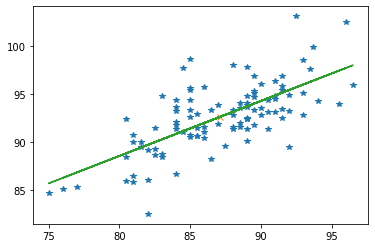

In [297]:
plt.plot(X, y, '*');
plt.plot(X_avg, y_avg, 'x');
plt.plot(X, y_regression)
plt.show()

### Finding the next value based on the function that we calculated above

In [298]:
len(X)

104

In [299]:
X = np.append(X, [85])
len(X)

105

In [300]:
y_regression_test = a * X[104] + b
y_regression_test

array([91.40640232])

In [301]:
X[104]

85.0

In [302]:
y = np.append(y, y_regression_test)
len(y)

105

In [303]:
y_regression = (a * X) + b

In [304]:
len(X), len(y), len(y_regression)

(105, 105, 105)

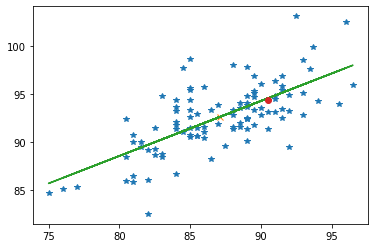

In [305]:
plt.plot(X, y, '*');
plt.plot(X_avg, y_avg, 'x');
plt.plot(X, y_regression)
plt.plot(X[18], y[18], 'o')
plt.show()

# Classification model

In this section we want to see the corelation between the gender of the possum and his body parameters


In [346]:
data_set

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,1,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,0,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,0,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,0,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,0,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,1,1,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,1,1,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,0,6,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,1,4,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [317]:
X = data_set.drop(["sex"], axis=1)

y = data_set["sex"]


In [343]:
X = X.drop(["Pop"], axis=1)

KeyError: "['Pop'] not found in axis"

In [344]:
X["footlgth"].fillna(X["footlgth"].mean(), inplace = True)

# Convertion
#### In order to work with the data that has the output "m"->male and "f"->female we need to convert them into numbers, and seeing that we have 2 types of outputs we can convert them into 0 and 1

In [345]:
y

0      1
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    0
102    1
103    0
Name: sex, Length: 104, dtype: int32

In [322]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

data_set.sex=lb.fit_transform(data_set.sex)

y = data_set["sex"]

In [323]:
len(y), len(X), y.shape, X.shape 

(104, 104, (104,), (104, 12))

In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


np.random.seed(32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

## Evaluating model

In [340]:
clf.score(X_train, y_train)

1.0

In [341]:
clf.score(X_test, y_test)

0.6666666666666666

### Predicting output

In [352]:
clf.predict(X)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [353]:
y

0      1
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    0
102    1
103    0
Name: sex, Length: 104, dtype: int32